In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image



# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter


from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# XGBOOST
from xgboost import XGBRegressor

# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('/home/piai/2. Big Data 분석/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [5]:
# 연비 숫자와 단위 분리
df[['Mileage', 'Mileage_Unit']] = df['Mileage'].str.split(expand=True)
df[['Engine', 'Engine_Unit']] = df['Engine'].str.split(expand=True)
df[['Power', 'Power_Unit']] = df['Power'].str.split(expand=True)
df[['New_Price', 'New_Price_Unit']] = df['New_Price'].str.split(expand=True)

# 컬럼명에 단위 표기
df.rename(columns={"Mileage": "Mileage_kml", "Engine":"Engine_CC", "Power":"Power_bhp","New_Price":"New_Price_Lakh"}, inplace=True)
# 단위 컬럼 제거
df.drop(['Engine_Unit', 'Mileage_Unit', 'Power_Unit', "New_Price_Unit"], axis=1, inplace=True)

# 숫자형 컬럼으로 변경
df['Engine_CC'] = pd.to_numeric(df['Engine_CC'], errors='coerce')
df['Mileage_kml'] = pd.to_numeric(df['Mileage_kml'], errors='coerce')
df['Power_bhp'] = pd.to_numeric(df['Power_bhp'], errors='coerce')
df['New_Price_Lakh'] = pd.to_numeric(df['New_Price_Lakh'], errors='coerce')

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,New_Price_Lakh
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN


In [6]:
# Mileage(km/l) 컬럼에 '0.0'값 발견
print(df['Mileage_kml'].value_counts())
# 'null'값이 갯수 확인
print(len(df[df['Mileage_kml'] == 0.0]))
# 문자 'null'을 np.nan으로 변경
df['Mileage_kml'].replace(0.0, np.nan, inplace=True)

17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
17.09      1
19.91      1
17.16      1
18.23      1
17.15      1
Name: Mileage_kml, Length: 438, dtype: int64
81


## 결측치를 같은값으로 보간할 수 있는지 비교

In [7]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            83
Engine_CC              46
Power_bhp             175
Seats                  53
New_Price_Lakh       6247
dtype: int64

### Price

* 목표변수이므로 보간x

###  Mileage(km/l)

In [8]:
NPN = df[df['Mileage_kml'].isnull() == True]['Name']
NP = df[df['Mileage_kml'].isnull() == False]['Name']

In [9]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

3


In [10]:
# 동일한 'Name'을 가진 행의 'Mileage_kml' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Mileage_kml'].isnull()].index
    npower = df.loc[np_idx, 'Mileage_kml'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Mileage_kml'] = npower

In [11]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              46
Power_bhp             175
Seats                  53
New_Price_Lakh       6247
dtype: int64

* 2개의 결측값 중 0개 보간

### Engine(CC)

In [12]:
NPN = df[df['Engine_CC'].isnull() == True]['Name']
NP = df[df['Engine_CC'].isnull() == False]['Name']

In [13]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

6


In [14]:
# 동일한 'Name'을 가진 행의 'Engine(CC)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Engine_CC'].isnull()].index
    npower = df.loc[np_idx, 'Engine_CC'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Engine(CC)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Engine_CC'] = npower

In [15]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             175
Seats                  53
New_Price_Lakh       6247
dtype: int64

* 46개의 결측값 중 6개 보간

### Power(bhp)

In [16]:
NPN = df[df['Power_bhp'].isnull() == True]['Name']
NP = df[df['Power_bhp'].isnull() == False]['Name']

In [17]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

39


In [18]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣는다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Power_bhp'].isnull()].index
    npower = df.loc[np_idx, 'Power_bhp'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체한다.
    df.loc[df['Name'] == car_name, 'Power_bhp'] = npower

In [19]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             136
Seats                  53
New_Price_Lakh       6247
dtype: int64

* 175개의 결측값 중 39개 보간

### Seats

In [20]:
NPN = df[df['Seats'].isnull() == True]['Name']
NP = df[df['Seats'].isnull() == False]['Name']

In [21]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

7


In [22]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Seats'].isnull()].index
    npower = df.loc[np_idx, 'Seats'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Seats'] = npower

In [23]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price_Lakh       6247
dtype: int64

* 53개의 결측값 중 7개 보간

### New_Price(Lakh)

In [24]:
NPN = df[df['New_Price_Lakh'].isnull() == True]['Name']
NP = df[df['New_Price_Lakh'].isnull() == False]['Name']

In [25]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

227


In [26]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['New_Price_Lakh'].isnull()].index
    npower = df.loc[np_idx, 'New_Price_Lakh'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'New_Price_Lakh'] = npower

In [27]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price_Lakh       6020
dtype: int64

* 6247개의 결측값 중 227개 보간

## 결측치 처리

In [28]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             136
Seats                  46
New_Price_Lakh       6020
dtype: int64

In [29]:
# Data shape 확인
df.shape

(7253, 13)

In [30]:
print(f'New_Price_Lakh컬럼의 결측치 비율 : {6020/7253*100}%')

New_Price_Lakh컬럼의 결측치 비율 : 83.00013787398318%


In [31]:
# 'New_Price(Lakh)'행 제외
df = df.drop('New_Price_Lakh', axis=1)

* 결측값이 0.83이므로 대체하기보다는 열 자체를 제외하기로 판단.

In [32]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml            80
Engine_CC              40
Power_bhp             136
Seats                  46
dtype: int64

In [33]:
df.corr()

,Price,Year,Kilometers_Driven,Mileage_kml,Engine_CC,Power_bhp,Seats
Price,1.000000,0.303140,-0.014603,-0.325386,0.640075,0.754943,0.052851
Year,0.303140,1.000000,-0.187859,0.301972,-0.054194,0.015409,0.008798
Kilometers_Driven,-0.014603,-0.187859,1.000000,-0.069535,0.094778,0.029445,0.090160
Mileage_kml,-0.325386,0.301972,-0.069535,1.000000,-0.644964,-0.550604,-0.347694
Engine_CC,0.640075,-0.054194,0.094778,-0.644964,1.000000,0.859473,0.399333
Power_bhp,0.754943,0.015409,0.029445,-0.550604,0.859473,1.000000,0.096774
Seats,0.052851,0.008798,0.090160,-0.347694,0.399333,0.096774,1.000000


In [34]:
# KNN 보간을 위해 필요한 열 선택
columns_to_interpolate = ['Mileage_kml', 'Engine_CC', 'Power_bhp', 'Seats']
KKK = []
# 표준화를 위해 StandardScaler 사용
scaler = StandardScaler()
df[columns_to_interpolate] = scaler.fit_transform(df[columns_to_interpolate])

# KNN 보간 수행
imputer = KNNImputer(n_neighbors=5)
df[columns_to_interpolate] = imputer.fit_transform(df[columns_to_interpolate])

# 보간된 데이터를 표준화된 스케일에서 원래 스케일로 변환
df[columns_to_interpolate] = scaler.inverse_transform(df[columns_to_interpolate])

* 'Mileage(km/l)','Engine(CC)','Power(bhp)','Seats'컬럼들간의 상관성 확인 후 KNN평균값으로 결측치 대체

In [35]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_kml             0
Engine_CC               0
Power_bhp               0
Seats                   0
dtype: int64

In [36]:
# Price(목표변수) 결측 행 제거
df.dropna(inplace=True)

In [37]:
# 인덱스 초기화
df.reset_index(drop=True, inplace=True)
df.shape

(6200, 12)

## 파생변수 생성

In [38]:
# 데이터프레임에서 "Engine(CC)" 열의 값을 기준으로 차량을 분류하고 새로운 열 "Category"를 추가
def classify_vehicle(engine_cc):
    if engine_cc < 1200:
        return "소형 차량"
    elif 1200 <= engine_cc < 1500:
        return "중형 차량"
    elif 1500 <= engine_cc < 2000:
        return "대형 차량"
    elif engine_cc >= 2000:
        return "SUV 또는 럭셔리 차량"

df['Category'] = df['Engine_CC'].apply(classify_vehicle)

In [39]:
# 브랜드명 컬럼 생성
df['Brand'] = df['Name'].str.split().str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,소형 차량,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,대형 차량,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,소형 차량,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,중형 차량,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,대형 차량,Audi


In [40]:
# 브랜드별 국적 라벨링
nationality_mapping = {
    'Maruti': '인도',
    'Hyundai': '한국',
    'Honda': '일본',
    'Toyota': '일본',
    'Mercedes-Benz': '독일',
    'Volkswagen': '독일',
    'Ford': '미국',
    'Mahindra': '인도',
    'BMW': '독일',
    'Audi': '독일',
    'Tata': '인도',
    'Skoda': '체코',
    'Renault': '프랑스',
    'Chevrolet': '미국',
    'Nissan': '일본',
    'Land': '영국',
    'Jaguar': '영국',
    'Fiat': '이탈리아',
    'Mitsubishi': '일본',
    'Mini': '영국',
    'Volvo': '스웨덴',
    'Porsche': '독일',
    'Jeep': '미국',
    'Datsun': '일본',
    'ISUZU': '일본',
    'Force': '인도',
    'Bentley': '영국',
    'Smart': '독일',
    'Ambassador': '인도',
    'Lamborghini': '이탈리아',
    'Hindustan': '인도',
    'OpelCorsa': '독일'
}

In [41]:
df['Nationality'] = df['Brand'].map(nationality_mapping)

In [42]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,소형 차량,Maruti,인도
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,대형 차량,Hyundai,한국
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,소형 차량,Honda,일본
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,중형 차량,Maruti,인도
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,대형 차량,Audi,독일


In [43]:
df['Nationality'] = df['Brand'].map(nationality_mapping)

#### Boxplot을 활용한 이상치 확인

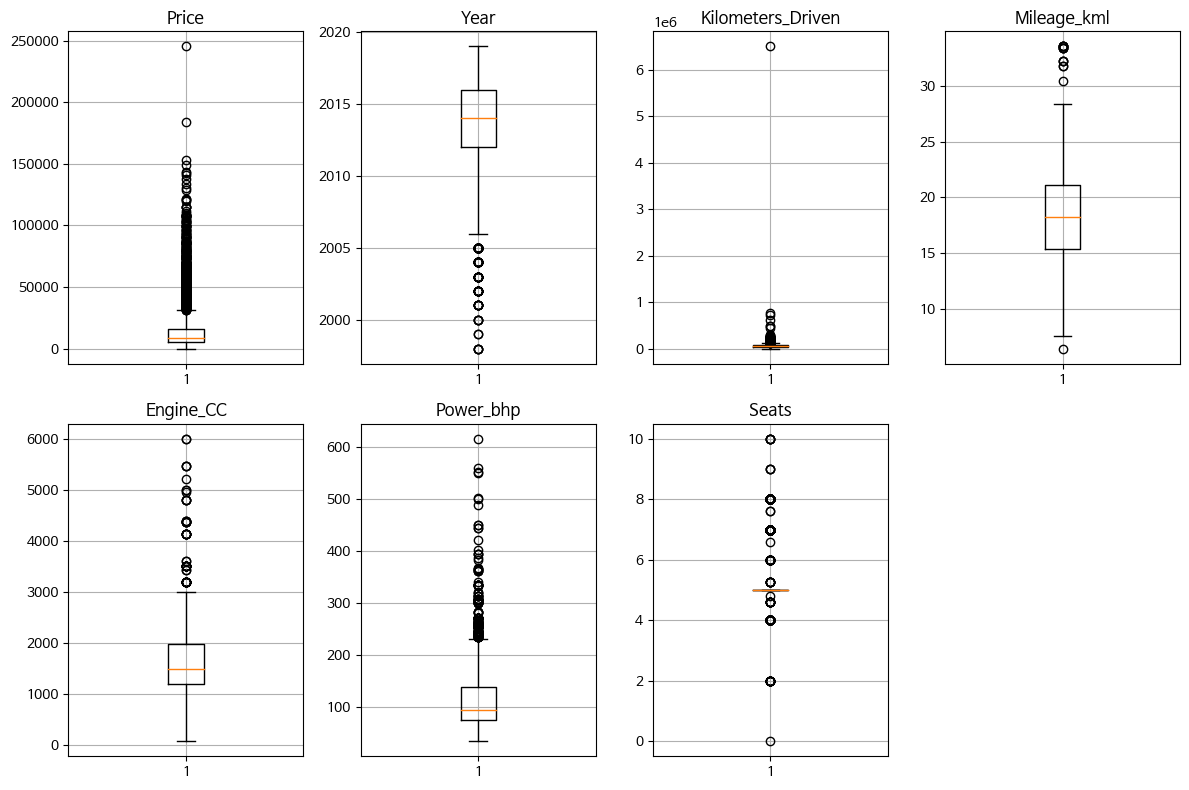

In [44]:
# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

* 자동종는 브랜드별 가종별로 그 편차가 크기 때문에 1.5IQR수염으로는 이상치를 판단하기 어려움

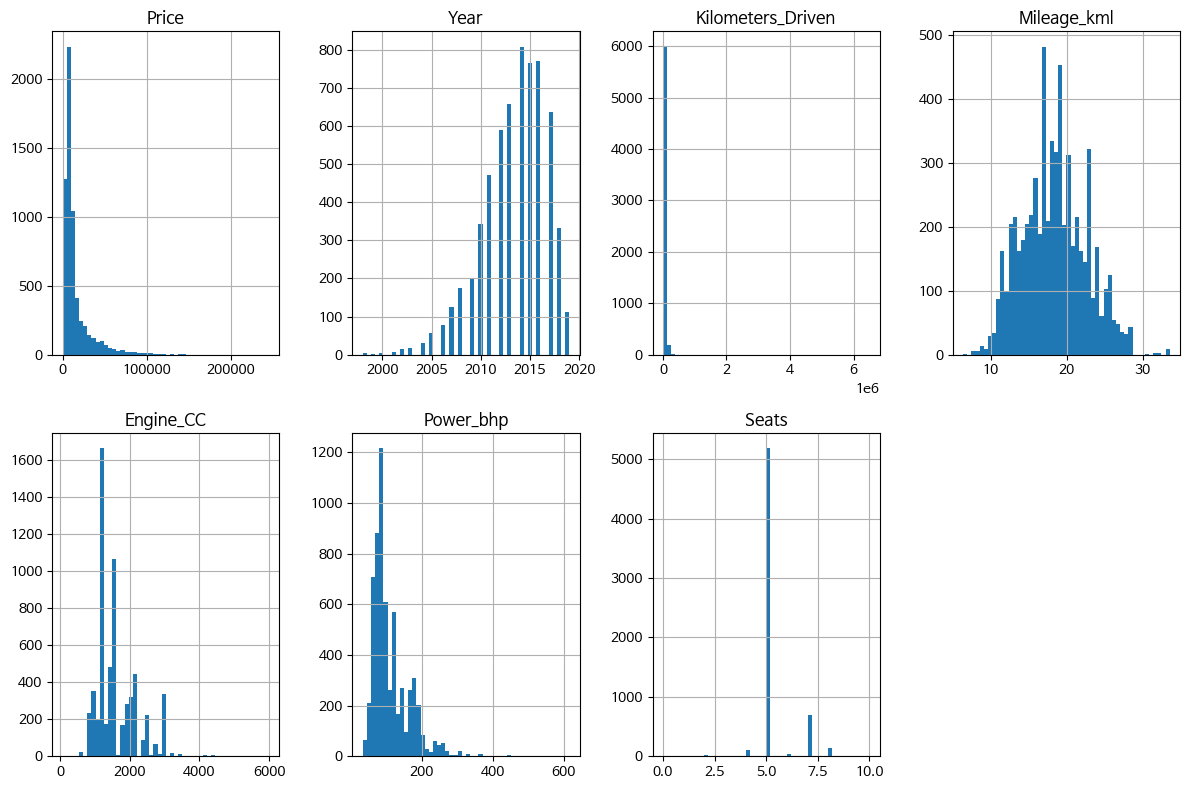

In [45]:
# 히스토그램 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 히스토그램 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

In [46]:
df[df['Price']>150000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,SUV 또는 럭셔리 차량,Land,영국
5781,Lamborghini Gallardo Coupe,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,SUV 또는 럭셔리 차량,Lamborghini,이탈리아
5919,Jaguar F Type 5.0 V8 S,Hyderabad,153296.0,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,SUV 또는 럭셔리 차량,Jaguar,영국


* 1.5억 이상의 기종 확인 결과 이상치가 아니라고 판단

In [47]:
df[df['Year']<2005]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
222,Maruti Wagon R LXI,Chennai,1916.20,2004,61000,Petrol,Manual,Second,18.90,998.0,67.100,5.0,소형 차량,Maruti,인도
274,Maruti Zen VXI BSII,Mumbai,843.13,2002,60000,Petrol,Manual,Third,17.30,993.0,60.000,5.0,소형 차량,Maruti,인도
315,Tata Sumo Delux,Hyderabad,2299.44,2000,158000,Diesel,Manual,Second,14.07,2956.0,83.100,7.0,SUV 또는 럭셔리 차량,Tata,인도
336,Toyota Corolla H4,Chennai,3832.40,2004,105000,Petrol,Automatic,Second,11.30,1794.0,125.000,5.0,대형 차량,Toyota,일본
364,Maruti Zen LX,Kolkata,996.42,2003,65000,Petrol,Manual,First,17.30,993.0,60.000,5.0,소형 차량,Maruti,인도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,Maruti Wagon R LX,Pune,1532.96,2004,94000,Petrol,Manual,Second,18.90,998.0,67.100,5.0,소형 차량,Maruti,인도
5914,Skoda Octavia Elegance 1.9 TDI,Hyderabad,3449.16,2003,132000,Diesel,Manual,First,18.70,1896.0,66.000,5.0,대형 차량,Skoda,체코
5926,Maruti 800 DX BSII,Pune,843.13,2000,78000,Petrol,Manual,First,16.10,796.0,37.000,4.0,소형 차량,Maruti,인도
5943,Mahindra Jeep MM 540 DP,Chennai,2606.03,2002,75000,Diesel,Manual,First,14.72,2112.0,147.336,6.0,SUV 또는 럭셔리 차량,Mahindra,인도


* 2005년식 이하의 기종 확인 결과 이상치가 아니라고 판단

In [48]:
df[df['Kilometers_Driven']>1000000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
2328,BMW X5 xDrive 30d M Sport,Chennai,99642.4,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,SUV 또는 럭셔리 차량,BMW,독일


In [49]:
df = df.drop(df[df['Kilometers_Driven']>1000000].index, axis=0).reset_index(drop=True)

* 주행거리가 100만킬로미터 이상인 항목 확인결과 이상치로 판단하여 제거

In [50]:
df[df['Seats']<2]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
3998,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,302.3,0.0,SUV 또는 럭셔리 차량,Audi,독일


In [51]:
df = df.drop(df[df['Seats']<2].index, axis=0).reset_index(drop=True)

* 좌석 수 0으로 표기된 항목 제거

#### 이상치 제거 완료

# EDA

### 연속형 변수의 상관관계 분석

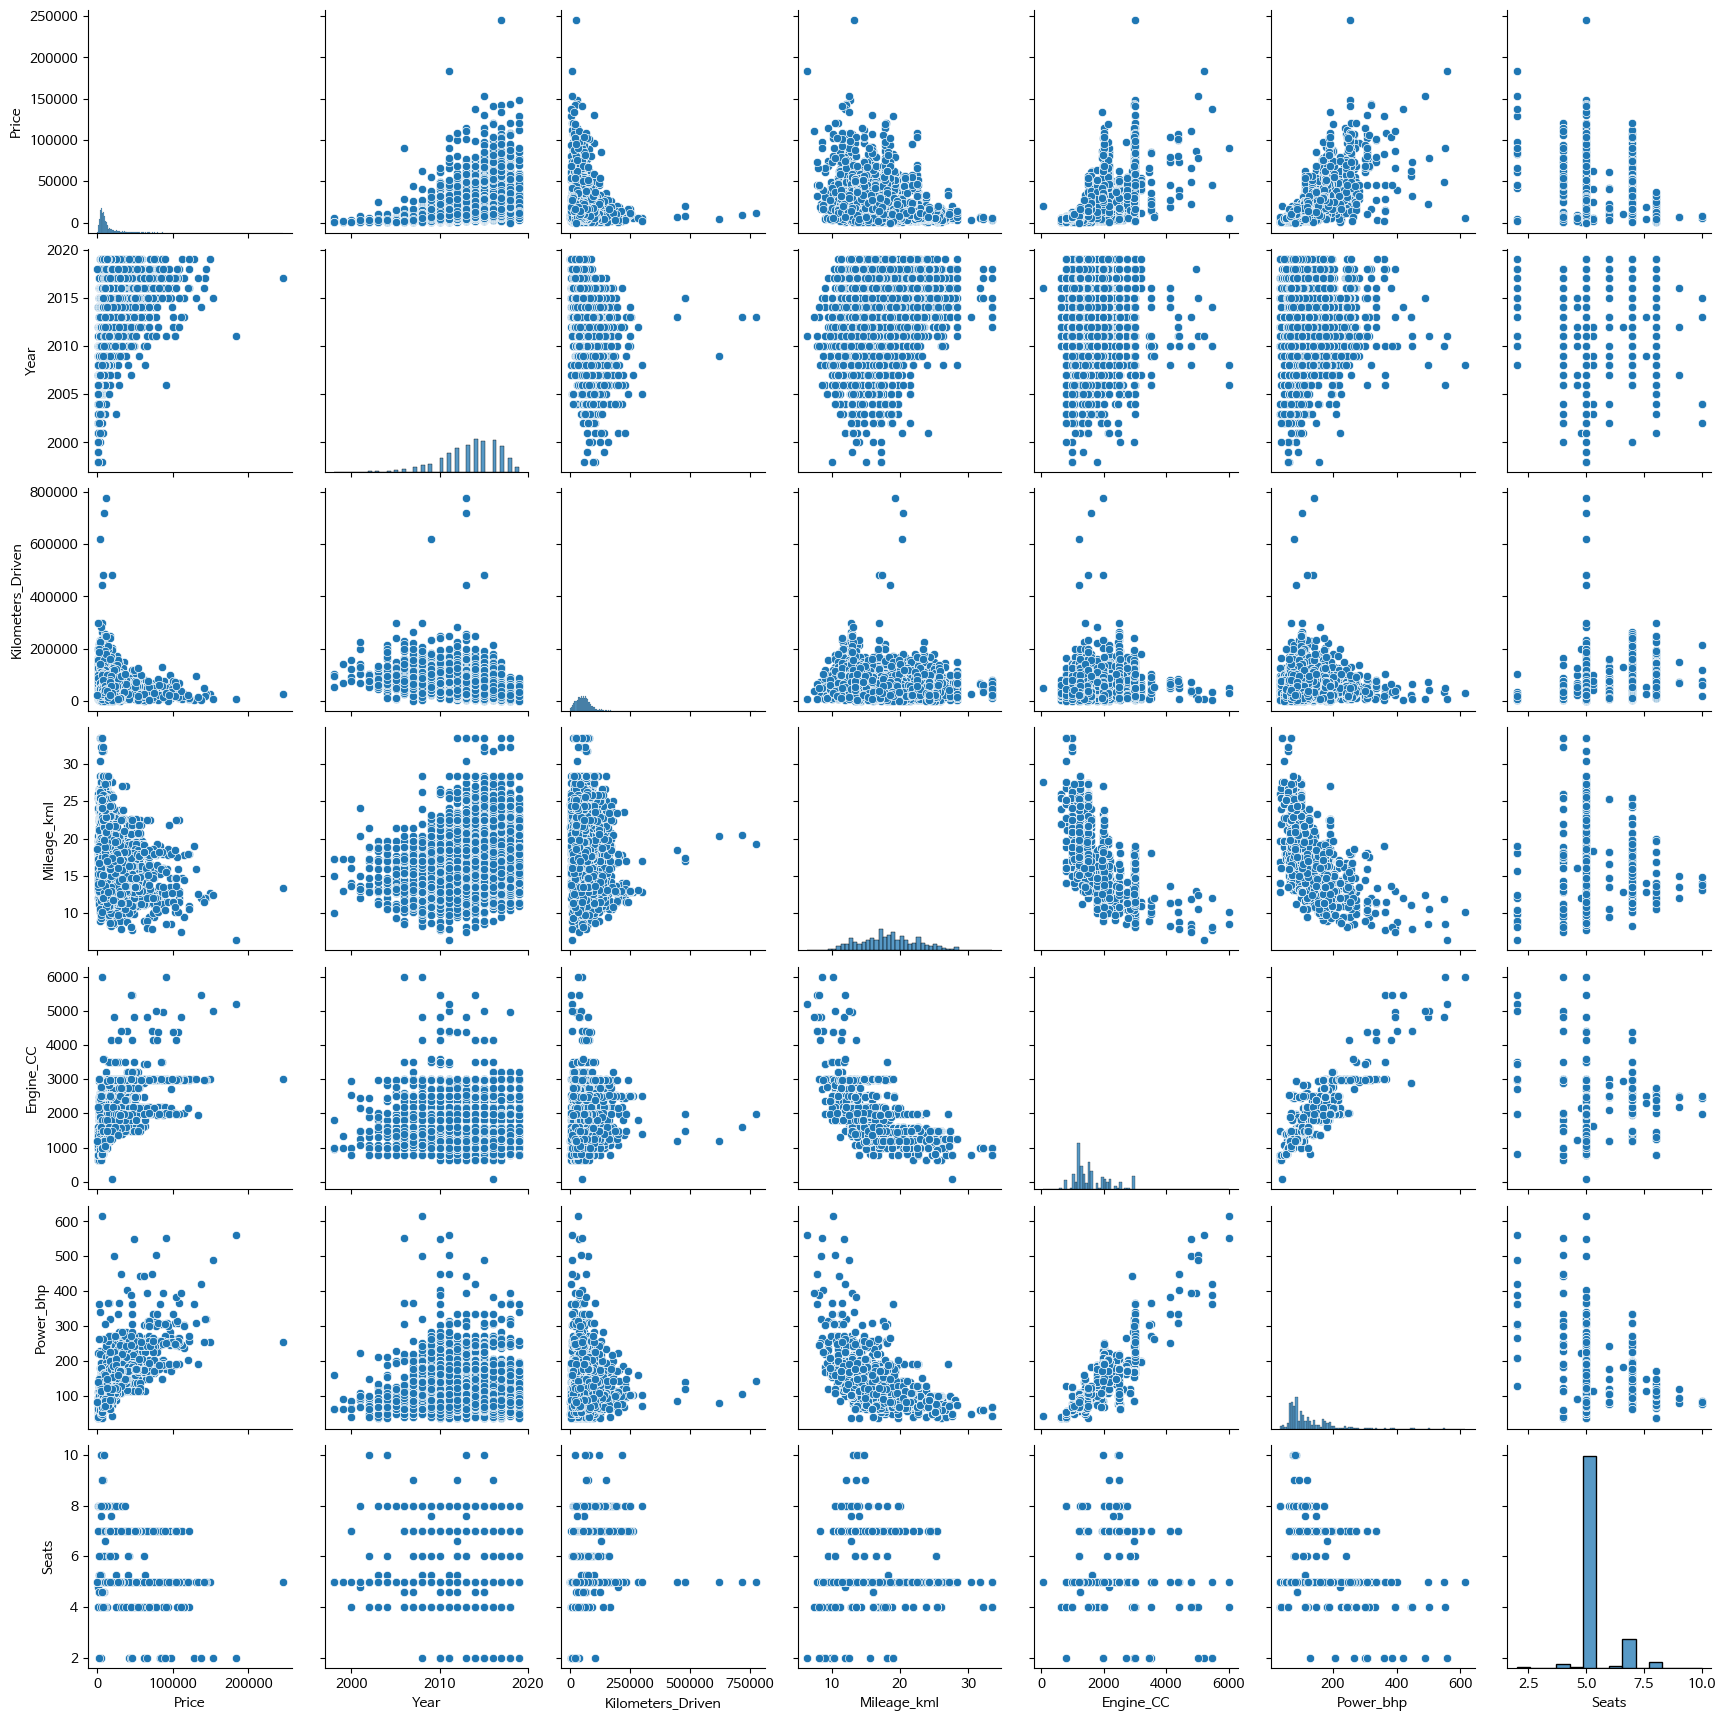

In [52]:
# 설명변수 간의 선형관계 확인
sns.pairplot(df)

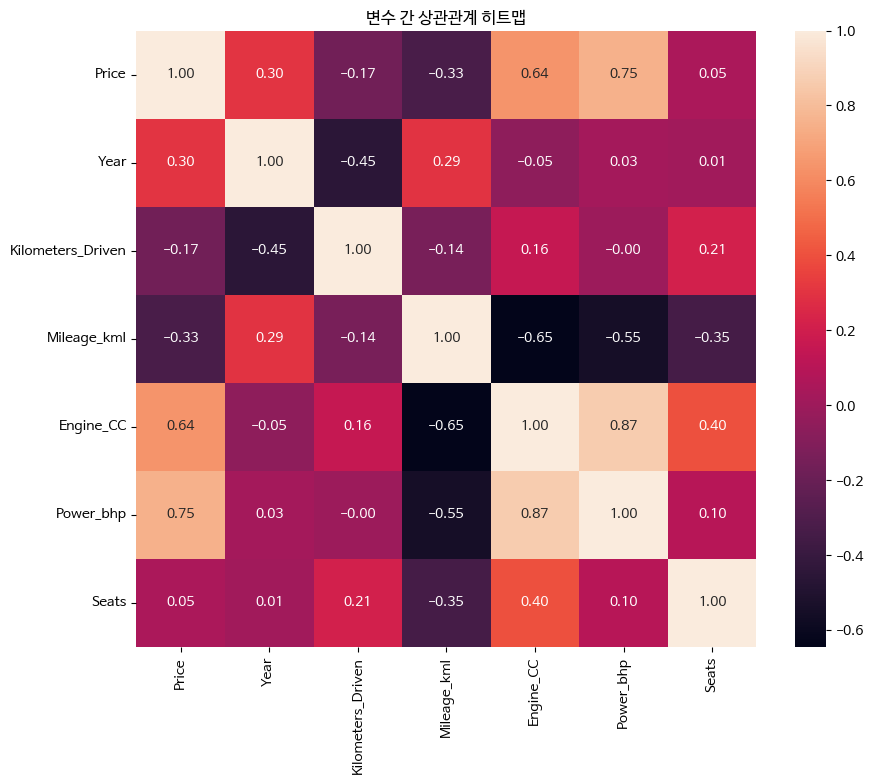

In [53]:
# 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("변수 간 상관관계 히트맵")
plt.show()

* 엔진CC와 연비 음의 상관관계(-0.64)
* 마력과 연비 음의 상관관계(-0.55)
* 가격과 마력 양의 상관관계(0.75)
* 가격과 엔진CC 양의 상관관계(0.64)
* 엔진CC와 마력 양의 상관관계(0.86)

통계량 확인

In [54]:
df.columns

Index(['Name', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_kml', 'Engine_CC', 'Power_bhp',
       'Seats', 'Category', 'Brand', 'Nationality'],
      dtype='object')

In [55]:
df.describe()

,Price,Year,Kilometers_Driven,Mileage_kml,Engine_CC,Power_bhp,Seats
count,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000
mean,14896.798285,2013.433850,57107.253469,18.367900,1619.057983,112.750673,5.278289
std,17643.629623,3.272133,37730.313605,4.174318,599.906475,53.994611,0.804853
min,7.080000,1998.000000,171.000000,6.400000,72.000000,34.200000,2.000000
25%,5365.360000,2012.000000,33000.000000,15.400000,1198.000000,74.000000,5.000000
50%,8814.520000,2014.000000,52506.500000,18.200000,1493.000000,93.700000,5.000000
75%,15839.312500,2016.000000,72203.500000,21.100000,1969.000000,138.100000,5.000000
max,245273.600000,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000


#### 차량분류(엔진CC 구간화)에 따른 가격

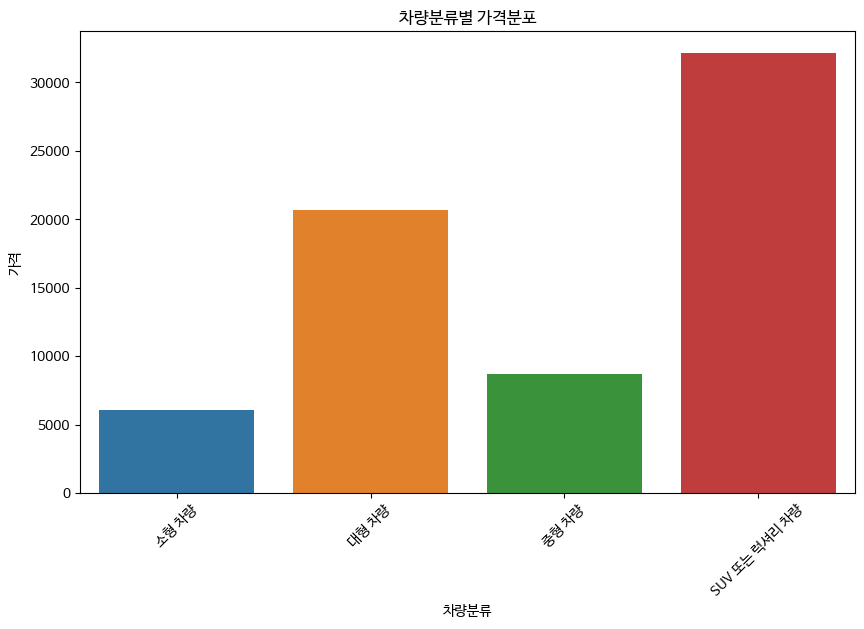

In [56]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Category', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('차량분류별 가격분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('차량분류')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

* H0 : 차량분류별로 가격평균의 차이가 없다.
* H1 : 차량분류별로 가격평균의 차이가 있다.

In [57]:
# 정규성검정
statistic, p = stats.shapiro(df[df['Category']=='소형 차량']['Price'])
print('소형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='중형 차량']['Price'])
print('중형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='대형 차량']['Price'])
print('대형 차량: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Category']=='SUV 또는 럭셔리 차량']['Price'])
print('SUV 또는 럭셔리 차량: statistic={}, p-value={}'.format(statistic, p))

소형 차량: statistic=0.9731748104095459, p-value=1.5925145850666906e-18
중형 차량: statistic=0.8391040563583374, p-value=2.0884868234389214e-39
대형 차량: statistic=0.8317849636077881, p-value=4.3402814649609785e-34
SUV 또는 럭셔리 차량: statistic=0.8313438296318054, p-value=4.007445749655417e-34


* 4개의 분류 모두 정규성을 따르지 않는다.

In [58]:
# 아노바검정
f_results = stats.f_oneway(
    df[df['Category']=='소형 차량']['Price'],
    df[df['Category']=='중형 차량']['Price'],
    df[df['Category']=='대형 차량']['Price'],
    df[df['Category']=='SUV 또는 럭셔리 차량']['Price']
)

# f, p값 출력
f, p = f_results.statistic.round(3), f_results.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 통계량: 996.253
p-value: 0.0


* 정규성을 만족하지않지만 ANOVA검정 결과 귀무가설을 기각한다는 결과 도출

In [59]:
grouped_data = [group['Price'].values for name, group in df.groupby('Category')]

# Kruskal-Wallis H 검정을 수행합니다.
H_statistic, p_value = stats.kruskal(*grouped_data)

print(f"Kruskal-Wallis H statistic: {H_statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis H statistic: 2547.3493821402953
P-value: 0.0


* ANOVA분석 결과를 신뢰할 수 없으므로 Kruskal-Wallis H 비모수검정 시행
* 결과: P_Value<0.05이므로 귀무가설 기각
* 따라서 차량분류(엔진CC)별 가격평균의 차이가 있다고 할 수 있음

In [67]:
df_small = df[df['Category']=='소형 차량']['Price']
df_medium = df[df['Category']=='중형 차량']['Price']
df_big = df[df['Category']=='대형 차량']['Price']
df_luxury = df[df['Category']=='SUV 또는 럭셔리 차량']['Price']

In [68]:
# 가설_소형차량, 중형 차량간의 비교
# 귀무가설: 소형차량과 중형차량 간에 가격평균에 차이가 없다.
# 대립가설: 소형차량과 중형차량 간에 가격평균에 차이가 있다.

t_result = stats.ttest_ind(df_small, df_medium)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

# 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 소형차량과 중형차량 간에 가격평균에 차이가 있다고 할 수 있다.
# t 통계량이 음수이므로 소형차량 가격 평균이 중형차량보다 작다는 것을 알 수있다

2-Sample t-test
t 통계량:-20.258
p-value:0.0


In [69]:
# 가설_대형차량, SUV 또는 럭셔리 차량간의 비교
# 귀무가설: 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 없다.
# 대립가설: 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 있다.

t_result = stats.ttest_ind(df_medium, df_luxury)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

# 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 대형차량과 SUV 또는 럭셔리 차량 간에 가격평균에 차이가 있다고 할 수 있다.
# t 통계량이 음수이므로 대형차량 가격 평균이 SUV 또는 럭셔리 차량 보다 작다는 것을 알 수있다

2-Sample t-test
t 통계량:-36.628
p-value:0.0


#### 연식과 가격

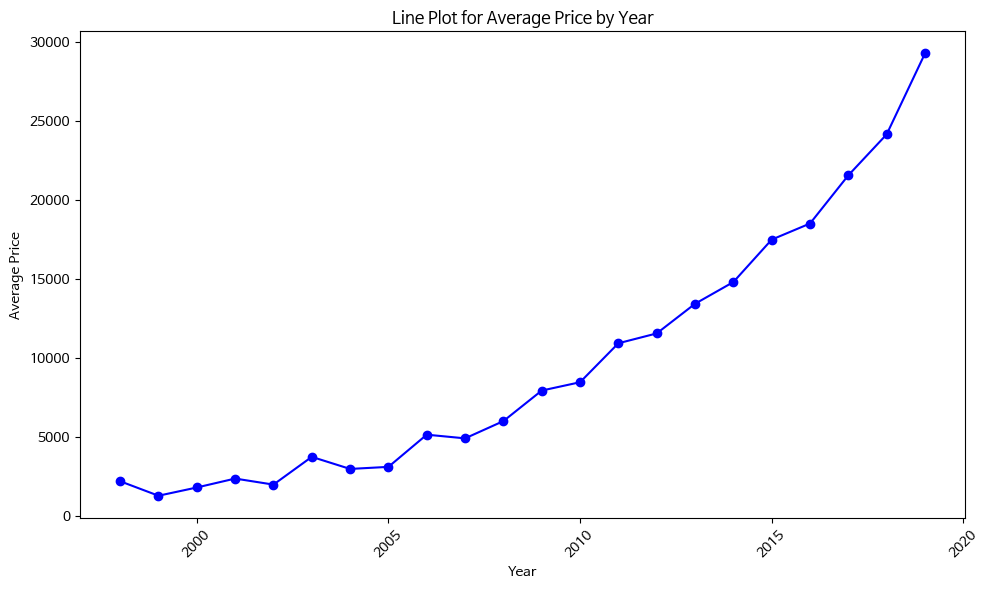

In [70]:
# 'Year' 변수에 따른 'Price' 변수의 평균 계산
yearly_mean_price = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 6))
yearly_mean_price.plot(kind='line', marker='o', color='blue')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Line Plot for Average Price by Year')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 년식이 최근일수록 가격이 비쌈
* 모집단의 평균 추정 불필요

#### 엔진CC와 연비

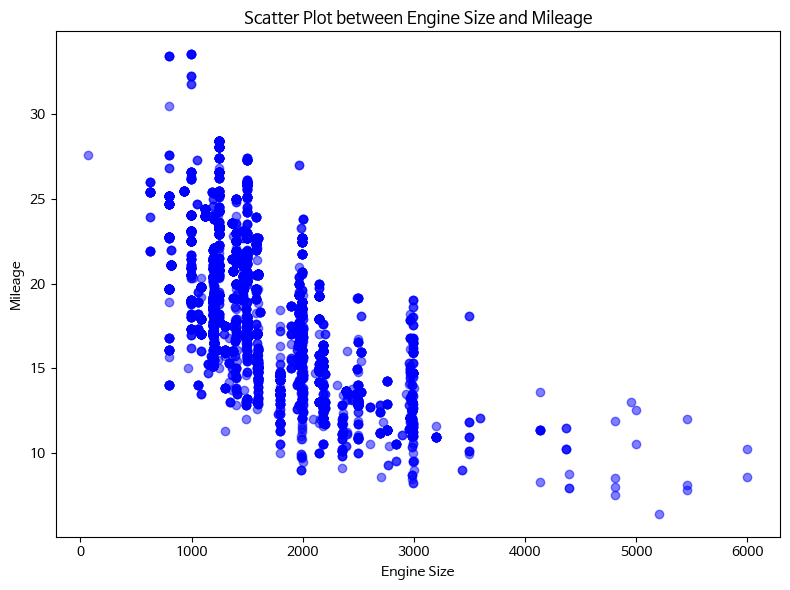

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine_CC'], df['Mileage_kml'], alpha=0.5, color='blue')

plt.xlabel('Engine Size')
plt.ylabel('Mileage')
plt.title('Scatter Plot between Engine Size and Mileage')

plt.tight_layout()
plt.show()

* 엔진CC가 높아질수록 연비 감소
* 모집단의 평균 추정 불필요

### 범주형 변수 상관관계 분석

#### 연료유형과 가격의 상관관계

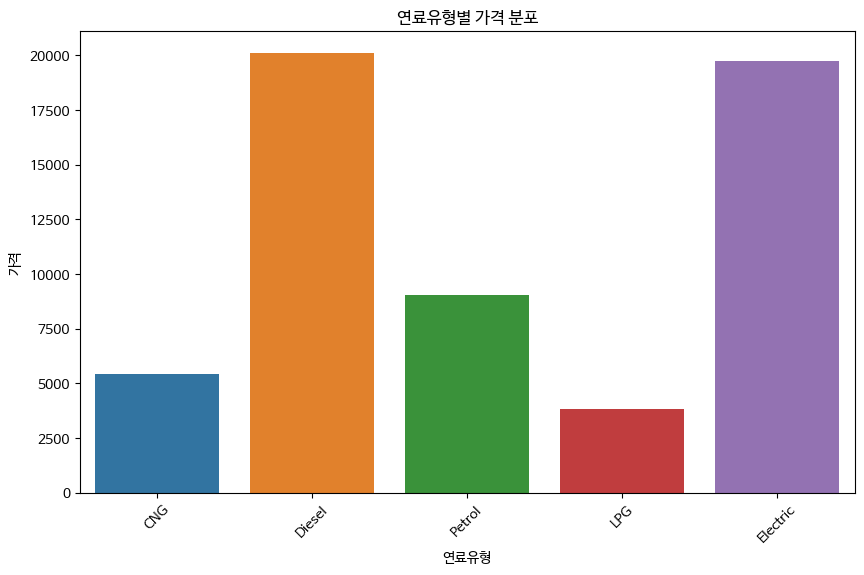

In [72]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Fuel_Type', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('연료유형별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('연료유형')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

* H0 : 연료유형별로 가격평균의 차이가 없다.
* H1 : 연료유형별로 가격평균의 차이가 있다.

In [73]:
# 정규성검정
statistic, p = stats.shapiro(df[df['Fuel_Type']=='Diesel']['Price'])
print('Diesel: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='Petrol']['Price'])
print('Petrol: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='LPG']['Price'])
print('LPG: statistic={}, p-value={}'.format(statistic, p))

statistic, p = stats.shapiro(df[df['Fuel_Type']=='CNG']['Price'])
print('CNG: statistic={}, p-value={}'.format(statistic, p))

# LPG만 정규성을 띈다

Diesel: statistic=0.7403157949447632, p-value=0.0
Petrol: statistic=0.4448670744895935, p-value=0.0
LPG: statistic=0.9055684804916382, p-value=0.2519165873527527
CNG: statistic=0.8620015382766724, p-value=1.105625051422976e-05


In [74]:
# 아노바검정
f_results_fuel = stats.f_oneway(
    df[df['Fuel_Type']=='Diesel']['Price'],
    df[df['Fuel_Type']=='Petrol']['Price'],
    df[df['Fuel_Type']=='LPG']['Price'],
    df[df['Fuel_Type']=='CNG']['Price']
)

# f, p값 출력
f, p = f_results_fuel.statistic.round(3), f_results_fuel.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 통계량: 230.224
p-value: 0.0


* ANOVA분석 결과를 신뢰할 수 없으므로 Kruskal-Wallis H 비모수검정 시행
* 결과: P_Value<0.05이므로 귀무가설 기각
* 따라서 연료유형별 가격평균의 차이가 있다고 할 수 있음

In [75]:
grouped_data = [group['Price'].values for name, group in df.groupby('Fuel_Type')]

# Kruskal-Wallis H 검정을 수행합니다.
H_statistic, p_value = stats.kruskal(*grouped_data)

print(f"Kruskal-Wallis H statistic: {H_statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis H statistic: 1242.237552441864
P-value: 1.1102382606689806e-267


* 정규성을 만족하는 것이 LPG밖에 없어 비모수검정인 Kruskal-Wallis 검정을 수행한 결과 p값이 0.05보다 작기때문에
 귀무가설을 기각하므로 연료유형별로 가격차이가 있다고 할 수있다.

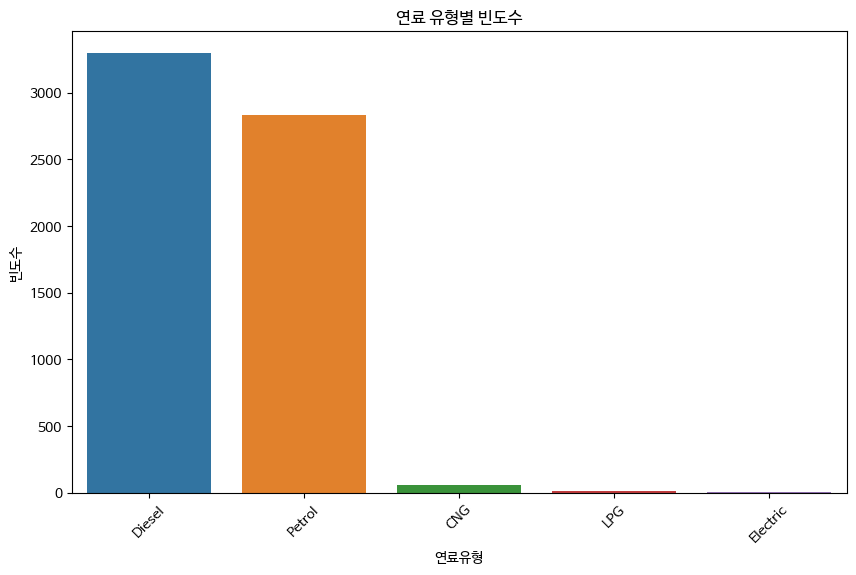

In [76]:
# 연료유형별 중고차 수

Fuel_Type_counts = df['Fuel_Type'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x=Fuel_Type_counts.index, y=Fuel_Type_counts.values)
plt.title('연료 유형별 빈도수')
plt.xlabel('연료유형')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 연료명이 긴 경우 겹치지 않도록 회전
plt.show()

* 차량연료유형별 판매량 확인결과 경유와 휘발유 차량이 대거 판매됨
* 따라서 경유와 휘발유를 대표로 가격비교 진행

In [77]:
df_Diesel = df[df['Fuel_Type']=='Diesel']['Price']
df_Petrol = df[df['Fuel_Type']=='Petrol']['Price']

* 귀무가설: Diesel과 Petrol 간에 가격평균에 차이가 없다.
* 대립가설: Diesel과 Petrol 간에 가격평균에 차이가 있다.

In [78]:
# 가설_Diesel, Petrol

t_result = stats.ttest_ind(df_Diesel, df_Petrol)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

2-Sample t-test
t 통계량:25.708
p-value:0.0


* 정규성을 따르지 않지만 2-Sample t-test를 진행해보았음
* 유의수준 5%에서 유의확률 p값이 0.0으로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
* 따라서 Diesel과 Petrol 간에 가격평균에 차이가 있다고 할 수 있다.
* t 통계량이 양수이므로 Diesel 연료의 차량 가격 평균이 Petrol보다 크다는 것을 알 수있다.

#### 브랜드별 가격의 상관관계

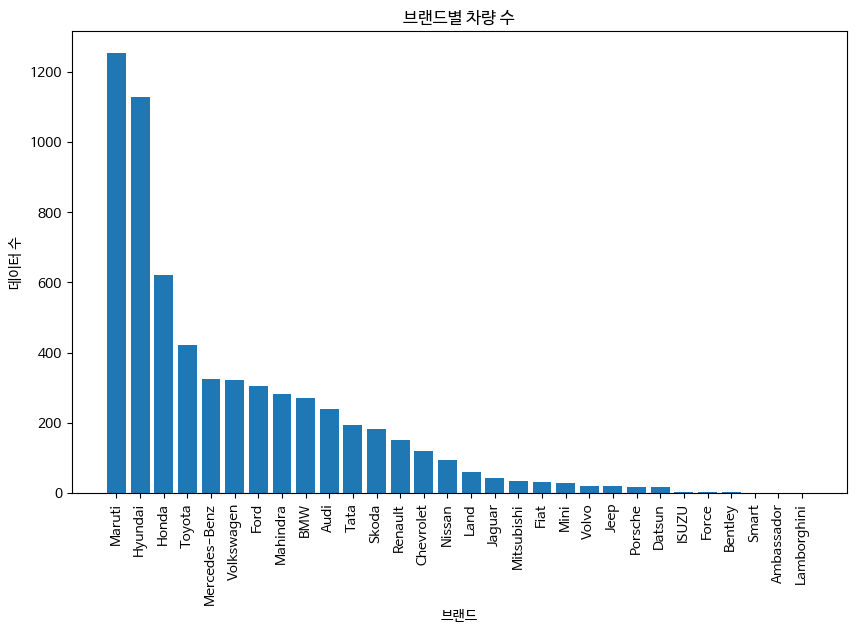

In [79]:
brand_counts = df['Brand'].value_counts()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts)
plt.title('브랜드별 차량 수')
plt.xlabel('브랜드')
plt.ylabel('데이터 수')
plt.xticks(rotation=90)
plt.show()

* 1,2,3위는 마루티, 현대, 혼다
* 3위 이후로는 대부분 유럽(영국,독일)브랜드의 비율이 높음
* 판매대수를 국가별로 파악해야할 필요성

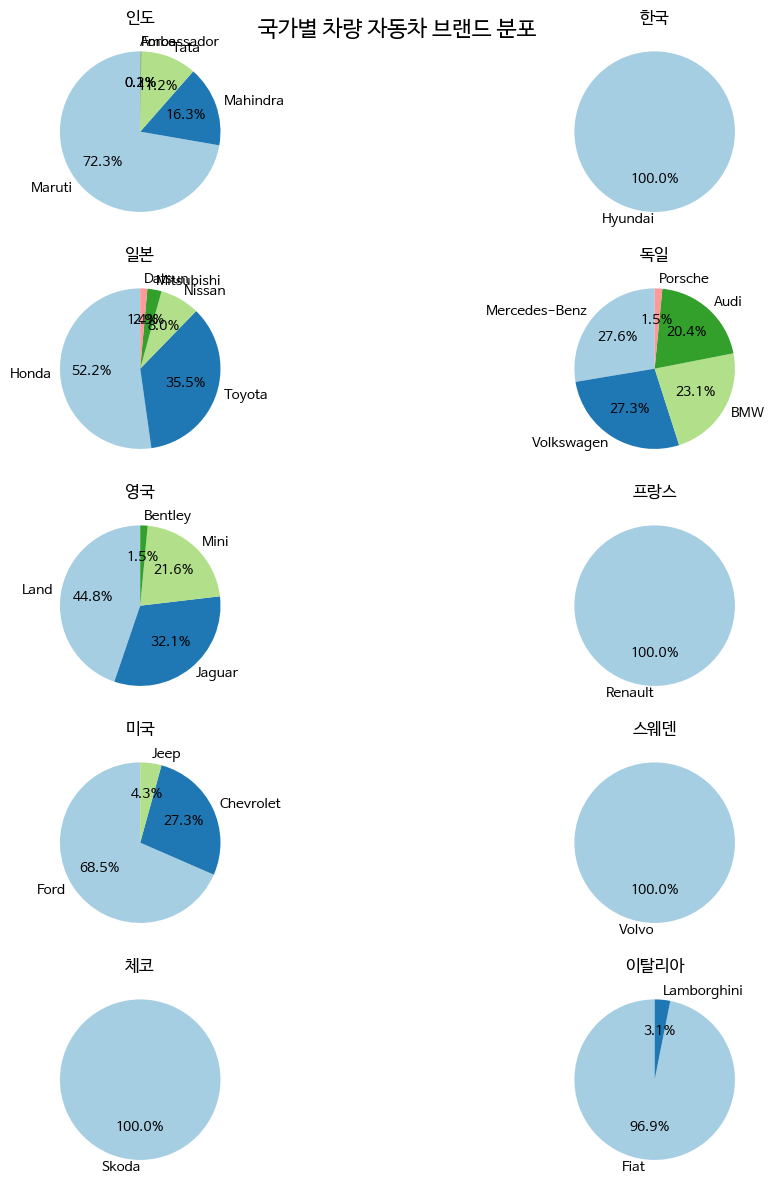

In [80]:
# 국가 목록 가져오기
nationalities = df['Nationality'].unique()

# 5x2 형식의 하위 그래프 생성
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

# 각 국가별로 자동차 브랜드 분포 파이 차트 그리기
for i, nationality in enumerate(nationalities):
    row = i // 2  # 행
    col = i % 2   # 열
    ax = axes[row, col]
    
    data = df[df['Nationality'] == nationality]
    brand_counts = data['Brand'].value_counts()[:5]  # 상위 5개 브랜드만 선택
    labels = brand_counts.index
    sizes = brand_counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(labels))))
    ax.set_title(nationality)
    
# 그래프 간 간격 조정
plt.tight_layout()

# 그림 제목 설정
fig.suptitle('국가별 차량 자동차 브랜드 분포', fontsize=16)
plt.show()


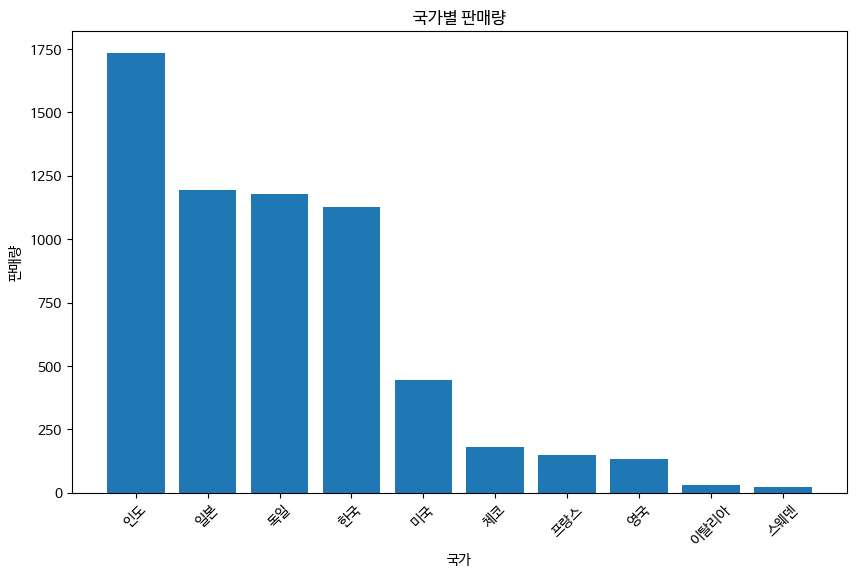

In [81]:
nationality_counts = df['Nationality'].value_counts()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(nationality_counts.index, nationality_counts)
plt.title('국가별 판매량')
plt.xlabel('국가')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.show()

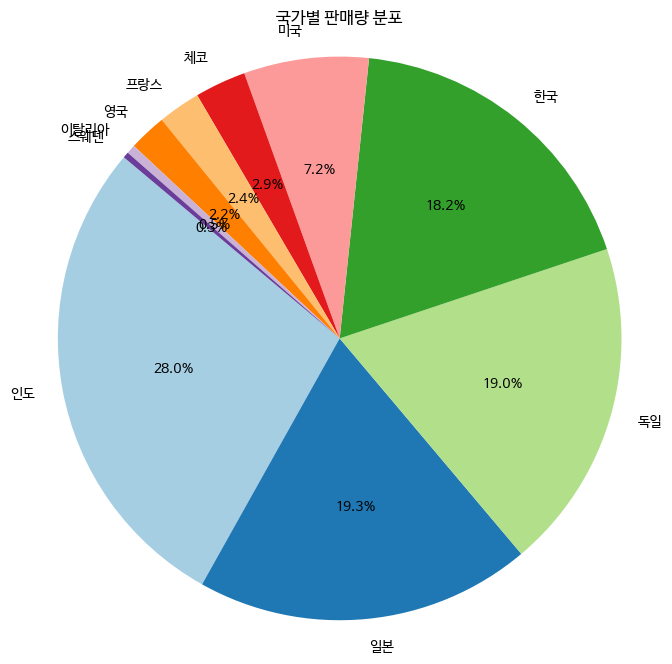

In [82]:
# 국가별 판매량 계산
nationality_count = df['Nationality'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(nationality_count, labels=nationality_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(nationality_count))))
plt.title('국가별 판매량 분포')
plt.axis('equal')
plt.show()

* 한국(18.2%)이 4번째로 많은 비중을 차지
* 독일(19.0%) 일본(19.3%)
* 판매량은 2위인 일본과 독일이 거의 같음

In [83]:
nationality_price_mean = df.groupby('Nationality')['Price'].mean().sort_values(ascending=False)
nationality_price_mean

Nationality
영국      56235.264552
독일      32332.066865
스웨덴     28824.027619
체코      12937.508571
일본      12323.419012
이탈리아    11403.785625
미국       9812.394077
프랑스      8997.053907
한국       8394.511436
인도       7790.608663
Name: Price, dtype: float64

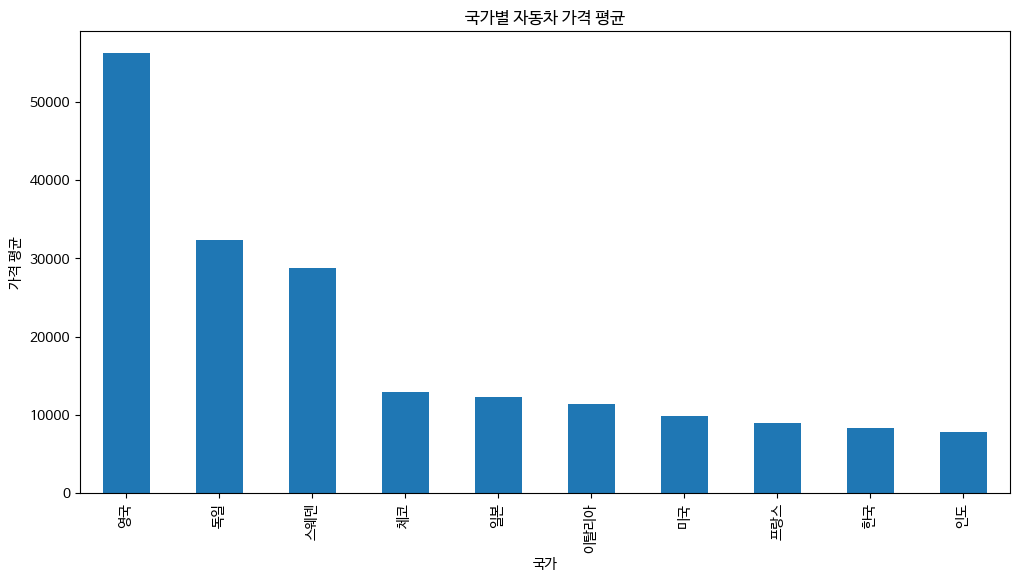

In [84]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
nationality_price_mean.plot(kind='bar')
plt.title('국가별 자동차 가격 평균')
plt.xlabel('국가')
plt.ylabel('가격 평균')
plt.show()

* 가격 평균은 유럽제(영국, 독일, 스웨덴) 자동차의 가격이 타국가 대비 3~6배 가량 높음

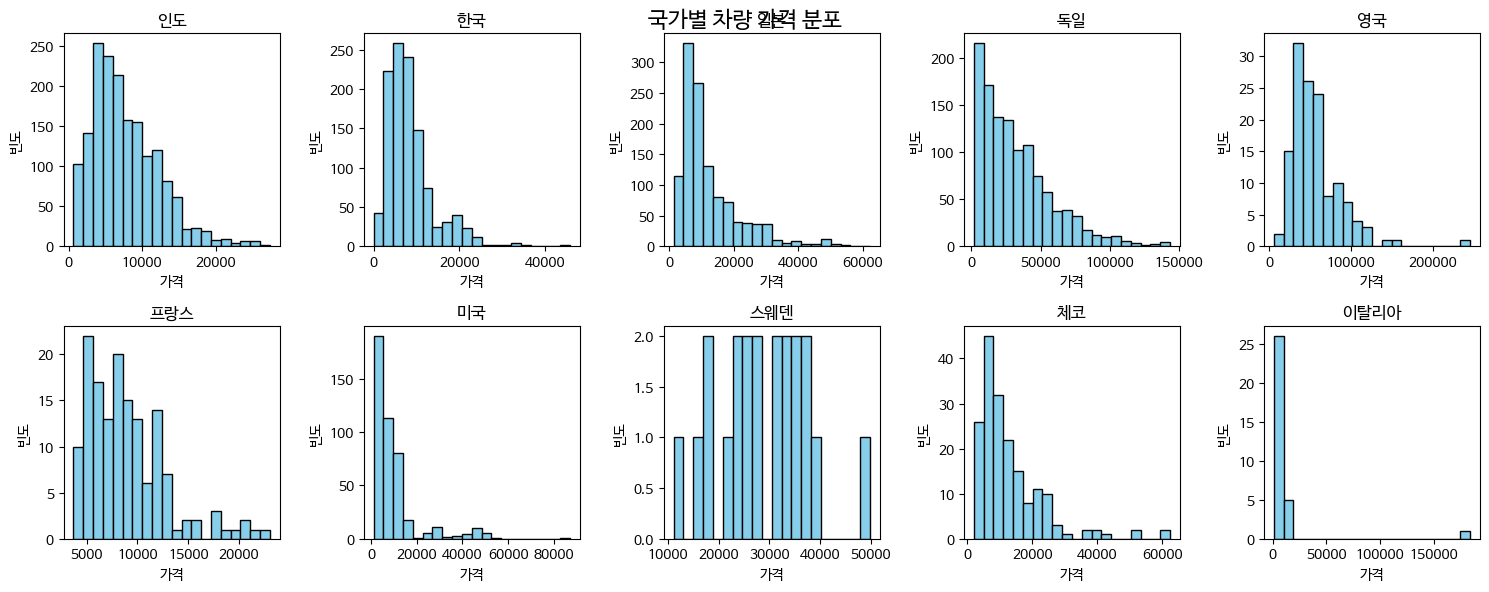

In [85]:
# 국가 목록
nationalities = df['Nationality'].unique()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, nationality in enumerate(nationalities):
    row = i // 5  # 행
    col = i % 5   # 열
    ax = axes[row, col]
    
    data = df[df['Nationality'] == nationality]
    ax.hist(data['Price'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(nationality)
    
# 통일된 X 축 레이블 설정
for ax in axes.flat:
    ax.set_xlabel('가격')
    ax.set_ylabel('빈도')

# 그래프 간 간격 조정
plt.tight_layout()

# 그림 제목 설정
fig.suptitle('국가별 차량 가격 분포', fontsize=16)
plt.show()

* 가격의 범위는 다르지만 모든 국가에서 저렴한 가격의 판매량이 높음
* 영국과 독일은 높은 가격대로 갈수록 판매량이 다소 완만

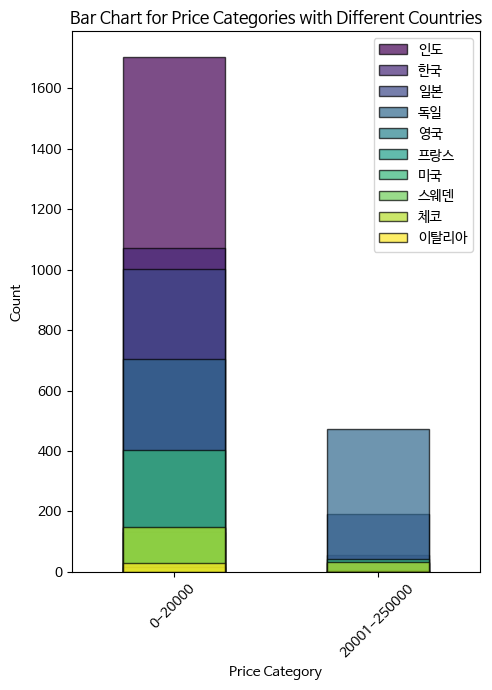

In [86]:
# 가격을 10개 구간으로 나누어 새로운 파생 변수 생성
bins = [0, 20000, 250000]
labels = ['0-20000', '20001-250000']
df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

# 국가명 가져오기
countries = df['Nationality'].unique()

# 적절한 색상 지정
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

# 그래프 생성
plt.figure(figsize=(5, 7))

# 각 국가별로 막대 그래프 그리기
for i, country in enumerate(countries):
    data = df[df['Nationality'] == country]
    price_counts = data['Price_Category'].value_counts()
    price_counts.plot(kind='bar', color=colors[i], edgecolor='black', label=country, alpha=0.7)

plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Bar Chart for Price Categories with Different Countries')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

* 2000만원 이상으로 판매되는 국가는 대부분 독일과 영국, 스웨덴
* 저렴한 자동차의 수요가 매우 많지만 수익성이 낮을 우려

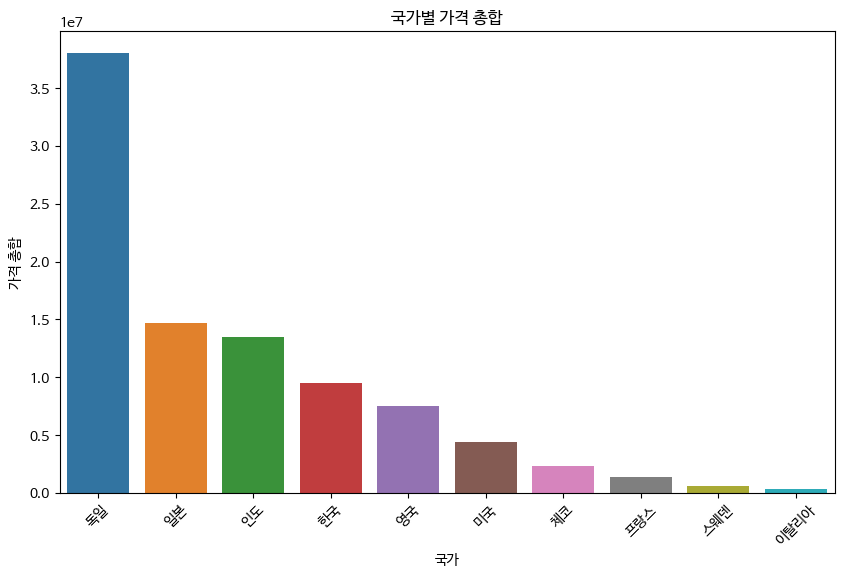

In [87]:
Nationality_price_sum = df.groupby('Nationality')['Price'].sum().sort_values(ascending=False).reset_index()

# 총합을 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='Price', data=Nationality_price_sum)
plt.title('국가별 가격 총합')
plt.xlabel('국가')
plt.ylabel('가격 총합')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

* 판매 차량의 가격 총합은 독일이 매우 높음
* 고객의 입장에서는 저렴한 중고차의 선호도가 높을지라도 판매자의 입장에서는 비싼차를 파는것이 수익적인 측면에서 경쟁력이 있다고 판단할 수 있음

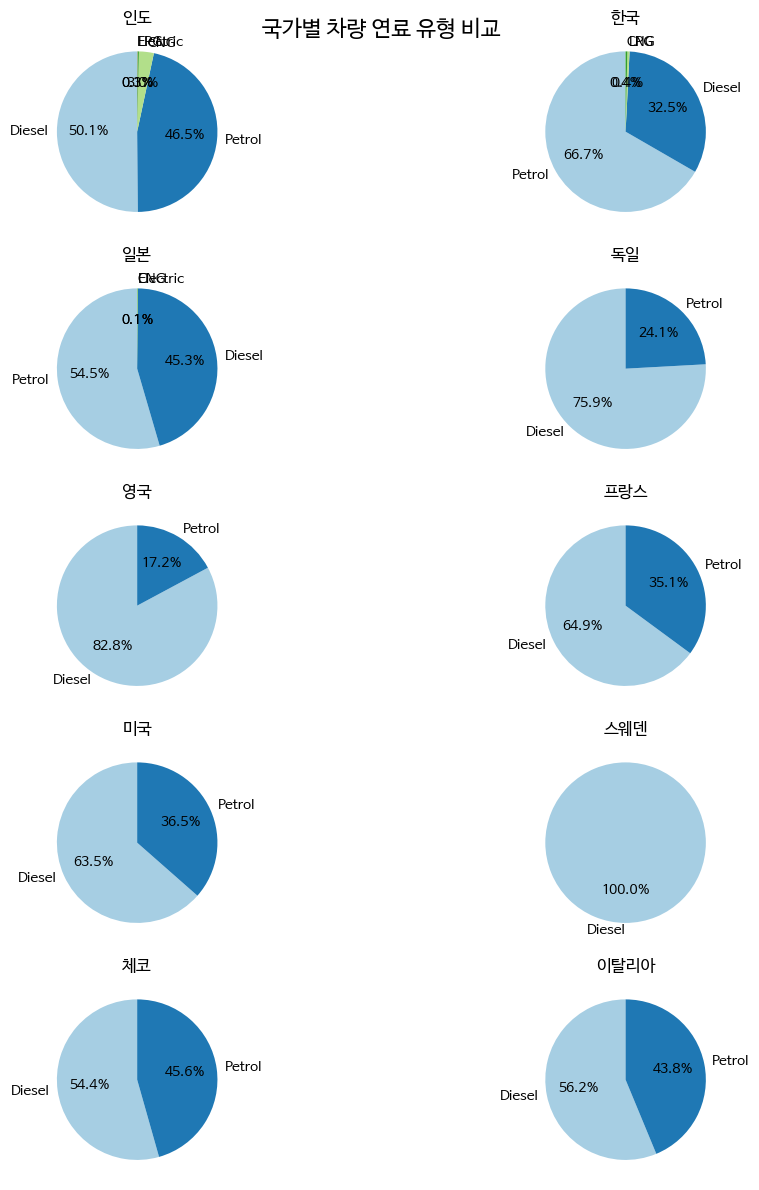

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 국가 목록 가져오기
nationalities = df['Nationality'].unique()

# 5x2 형식의 하위 그래프 생성
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

# 각 국가별로 연료 유형 비교 파이 차트 그ㅌ리기
for i, nationality in enumerate(nationalities):
    row = i // 2  # 행
    col = i % 2   # 열
    ax = axes[row, col]
    
    data = df[df['Nationality'] == nationality]
    fuel_type_counts = data['Fuel_Type'].value_counts()
    labels = fuel_type_counts.index
    sizes = fuel_type_counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(labels))))
    ax.set_title(nationality)
    
# 그래프 간 간격 조정
plt.tight_layout()

# 그림 제목 설정
fig.suptitle('국가별 차량 연료 유형 비교', fontsize=16)
plt.show()


* 독일, 영국은 디젤의 판매 비율이 매우 높음
* 고급차량을 선호하지만 고급유 주유에 대한 부담감이 작용했을 수 있음

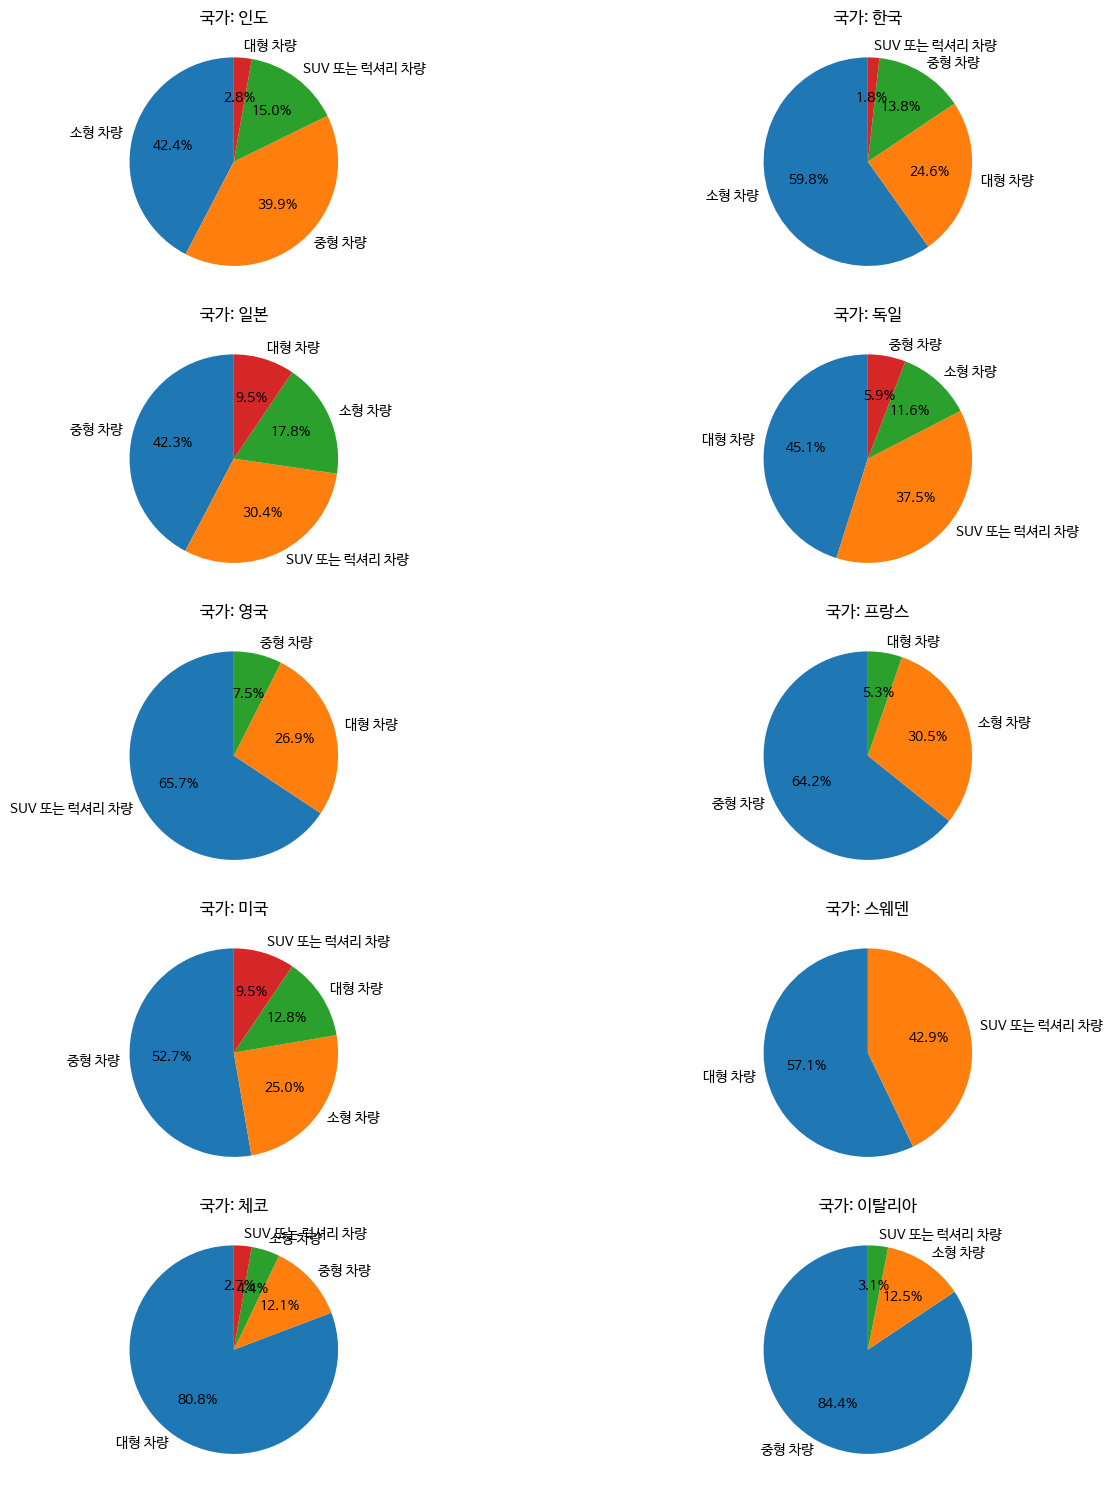

In [89]:
# 그래프의 행과 열 개수 설정
rows = 5
cols = 2

# 그래프 크기 설정
plt.figure(figsize=(15, 15))

# 고유한 국가 목록
countries = df['Nationality'].unique()

# 국가별로 서브플롯에 Pie Chart 그리기
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i + 1)
    country_data = df[df['Nationality'] == country]
    category_counts = country_data['Category'].value_counts()
    labels = category_counts.index
    sizes = category_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'국가: {country}')
    
# 남는 빈 서브플롯은 숨김
for i in range(len(countries), rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


* 수익성이 높은 독일과 영국 차량의 경우 대형차량과 SUV 또는 럭셔리 차량이 판매량의 대부분을 차지함

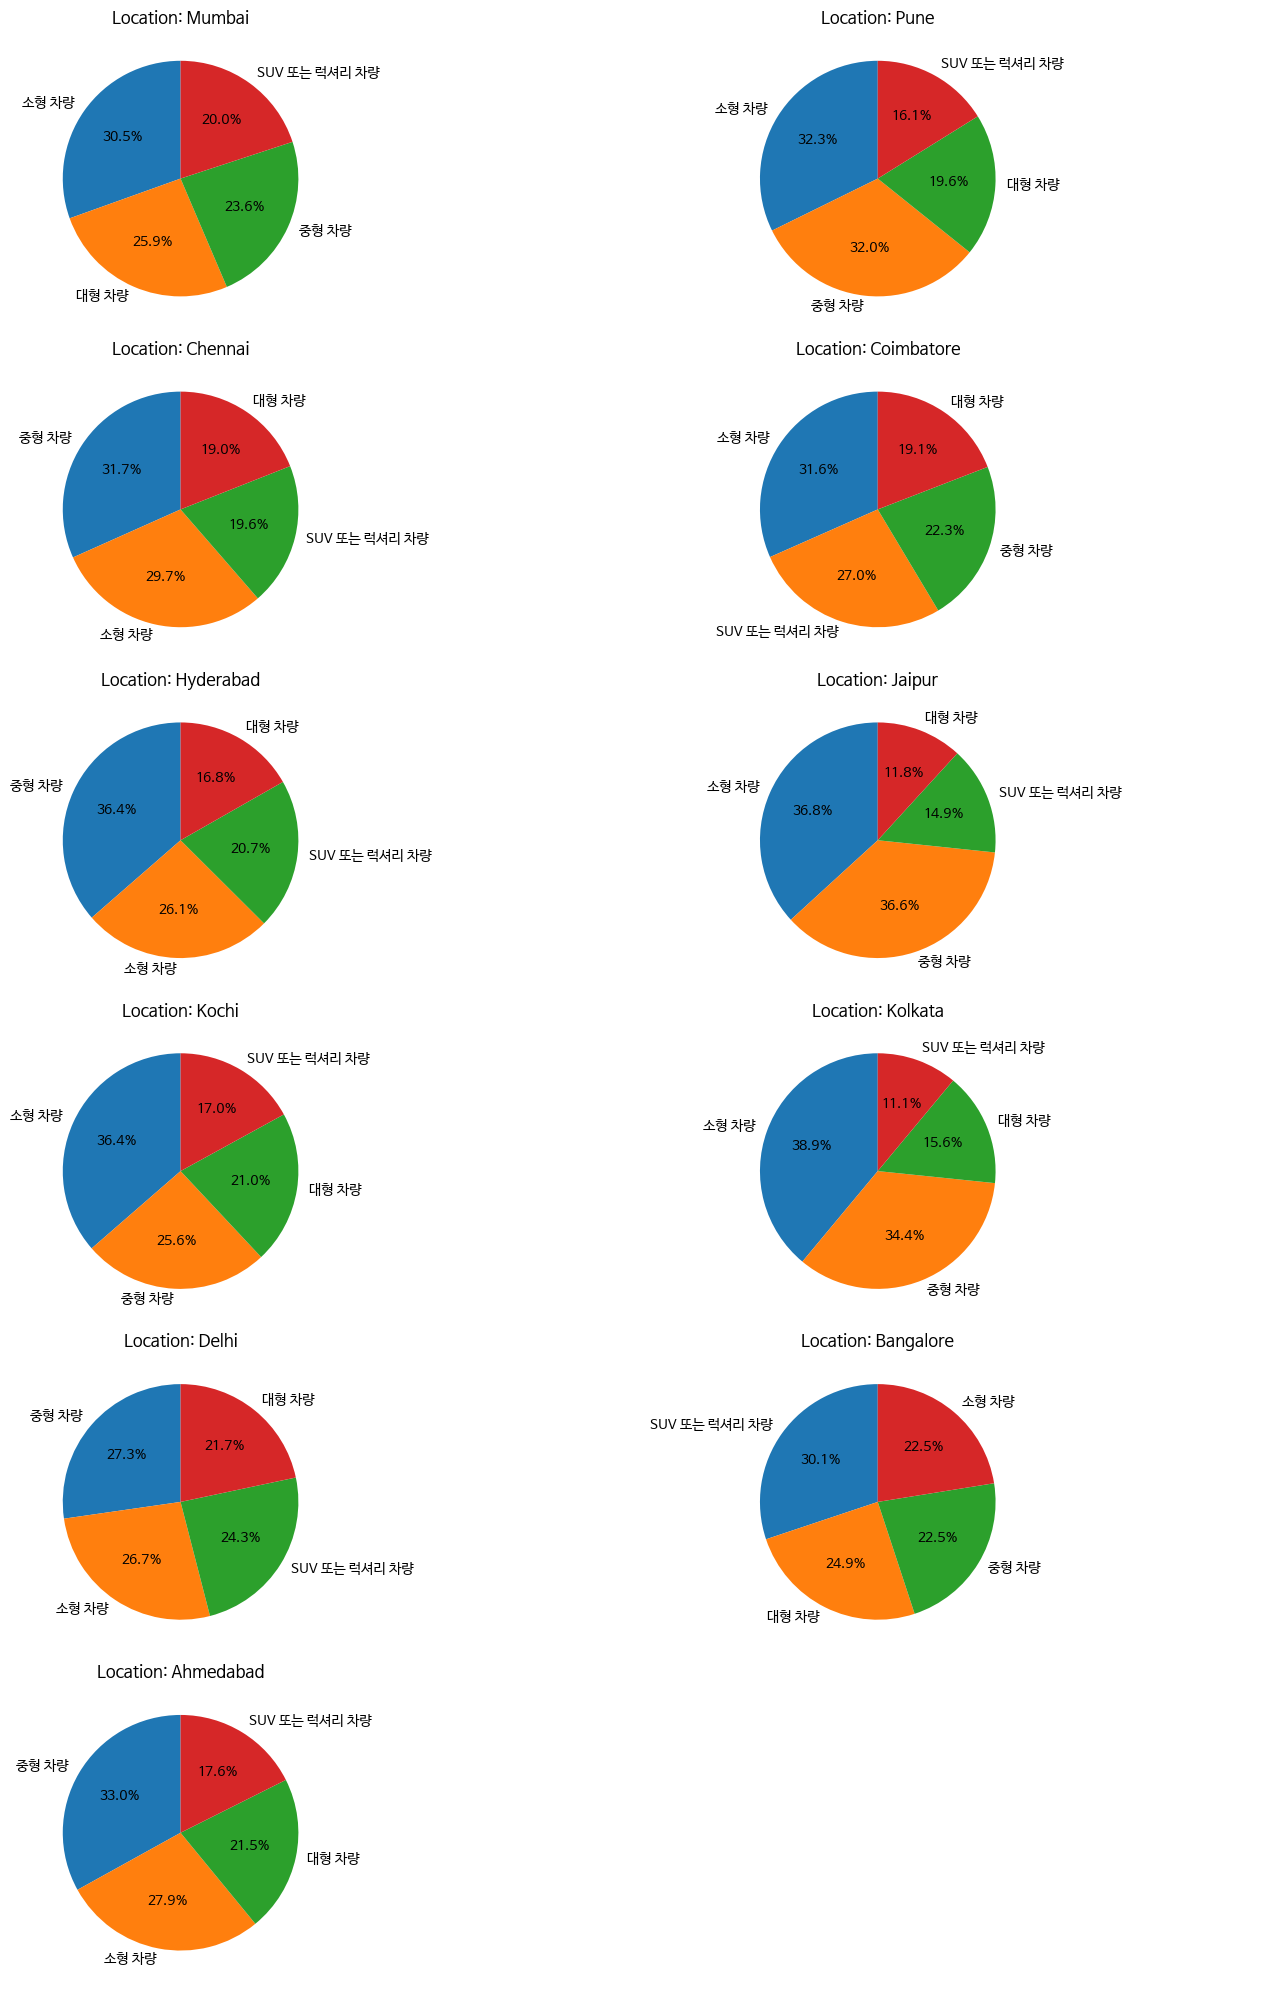

In [90]:
rows = 6
cols = 2

# 그래프 크기 설정
plt.figure(figsize=(15, 20))

# 고유한 Location 목록
locations = df['Location'].unique()

# Location별로 서브플롯에 Pie Chart 그리기
for i, location in enumerate(locations):
    plt.subplot(rows, cols, i + 1)
    location_data = df[df['Location'] == location]
    category_counts = location_data['Category'].value_counts()
    labels = category_counts.index
    sizes = category_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Location: {location}')
    
# 남는 빈 서브플롯은 숨김
for i in range(len(locations), rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

* Bangalore지역에서 SUV 또는 럭셔리 차량이 가장 많이 판매되며 소형차량의 비중이 작음
* Coimbatore, Mumbai지역에서 대형차량의 판매비중이 높음

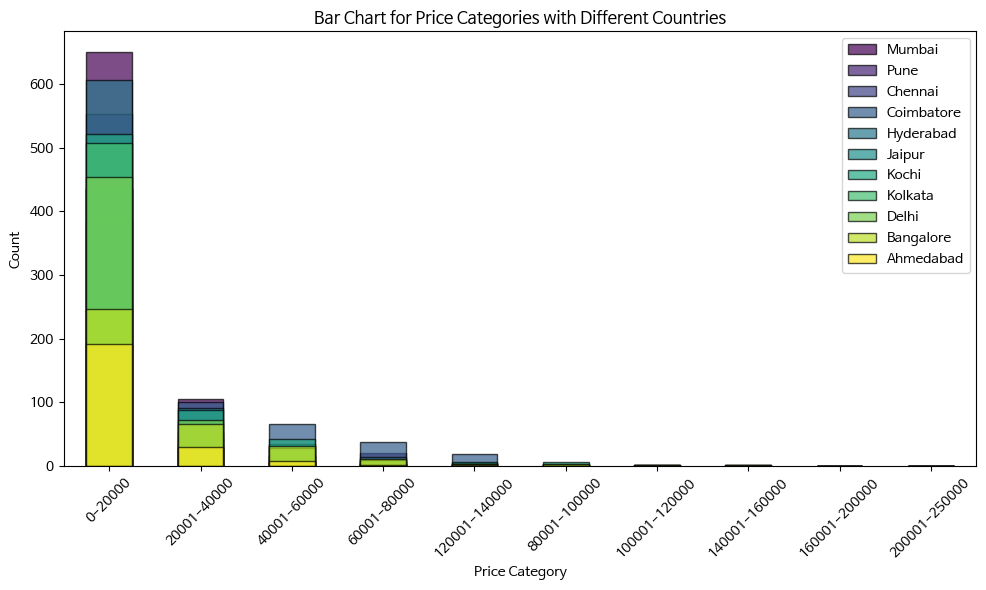

In [91]:
# 가격을 10개 구간으로 나누어 새로운 파생 변수 생성
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 200000, 250000]
labels = ['0-20000', '20001-40000', '40001-60000', '60001-80000', '80001-100000', '100001-120000', '120001-140000', '140001-160000', '160001-200000', '200001-250000']
df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

# 국가명 가져오기
countries = df['Location'].unique()

# 적절한 색상 지정
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 인도 내 판매지역 별로 막대 그래프 그리기
for i, country in enumerate(countries):
    data = df[df['Location'] == country]
    price_counts = data['Price_Category'].value_counts()
    price_counts.plot(kind='bar', color=colors[i], edgecolor='black', label=country, alpha=0.7)

plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Bar Chart for Price Categories with Different Countries')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

* Bangalore에서 2000만원 이상 차량의 판매 비중이 높음
* Coimbatore가 두번째로 비중이 높음

Mumbai: 소득의 상향 평준화를 이룬 지역. 인도에서 유일하게 빈민촌을 보유하지 않음. 
연평균 소득: 4,364달러(인도평균 1,410 X 3)

...

* 인도에서 가장 경쟁력 있는 도시 Top 10: 델리 > 뭄바이 > 첸나이 > 하이데라바드 > 콜카타 > 구르가온 > 노이다 > 뱅갈로르 > 푸네 > 아메다바드

# 모델링

In [92]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality,Price_Category
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,소형 차량,Maruti,인도,0-20000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,대형 차량,Hyundai,한국,0-20000
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,소형 차량,Honda,일본,0-20000
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,중형 차량,Maruti,인도,0-20000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,대형 차량,Audi,독일,20001-40000


In [93]:
# 고유값들인 Name 데이터를 제거함
df_drop_name = df.drop(['Name','Price_Category'], axis=1)
df_drop_name

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kml,Engine_CC,Power_bhp,Seats,Category,Brand,Nationality
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,소형 차량,Maruti,인도
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,대형 차량,Hyundai,한국
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,소형 차량,Honda,일본
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,중형 차량,Maruti,인도
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,대형 차량,Audi,독일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,소형 차량,Tata,인도
6194,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,중형 차량,Ford,미국
6195,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,중형 차량,Jeep,미국
6196,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,중형 차량,Maruti,인도


In [94]:
df_get_dummies = pd.get_dummies(df_drop_name)
df_get_dummies

,Price,Year,Kilometers_Driven,Mileage_kml,Engine_CC,Power_bhp,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Nationality_독일,Nationality_미국,Nationality_스웨덴,Nationality_영국,Nationality_이탈리아,Nationality_인도,Nationality_일본,Nationality_체코,Nationality_프랑스,Nationality_한국
0,2682.68,2010,72000,26.60,998.0,58.16,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,19162.00,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6898.32,2011,46000,18.20,1199.0,88.70,5.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9197.76,2012,87000,20.77,1248.0,88.76,7.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,27194.71,2013,40670,15.20,1968.0,140.80,5.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,10822.70,2016,41413,27.28,1047.0,69.00,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6194,13474.72,2017,39015,17.00,1497.0,121.36,5.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6195,27838.55,2018,6000,16.00,1368.0,160.00,5.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6196,16203.39,2017,21380,24.30,1248.0,88.50,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [95]:
# 목표변수, 설명변수 분리
df_y = df_get_dummies["Price"]
df_x = df_get_dummies.drop("Price", axis=1, inplace=False)

In [96]:
# 데이터를 7:3으로 나눔 --> train data & test data
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (4338, 72)
train data Y size: (4338,)
test data X size: (1860, 72)
test data Y size: (1860,)


In [97]:
# DecisionTree기본 모델 생성
dt_uncust = DecisionTreeRegressor(random_state=1234)
dt_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(dt_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(dt_uncust.score(df_test_x, df_test_y)))

Score on training set 1.000
Score on test set 0.710


In [98]:
dt_uncust.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [99]:
# RandomForest기본 모델 생성
rf_uncust = RandomForestRegressor(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Score on training set 0.980
Score on test set 0.856


In [100]:
dt_uncust.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [101]:
#기본 모델 생성
gb_uncust = GradientBoostingRegressor(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))

Score on training set 0.923
Score on test set 0.839


In [102]:
gb_uncust.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [103]:
#기본 모델 생성
xgb_uncust = XGBRegressor(random_state=1234)
xgb_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(xgb_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(xgb_uncust.score(df_test_x, df_test_y)))

Score on training set 0.994
Score on test set 0.840


In [104]:
xgb_uncust.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [111]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TestScore
0,10,0.638
1,20,0.771
2,30,0.812
3,40,0.823
4,50,0.829
5,60,0.832
6,70,0.834
7,80,0.838
8,90,0.839
9,100,0.839


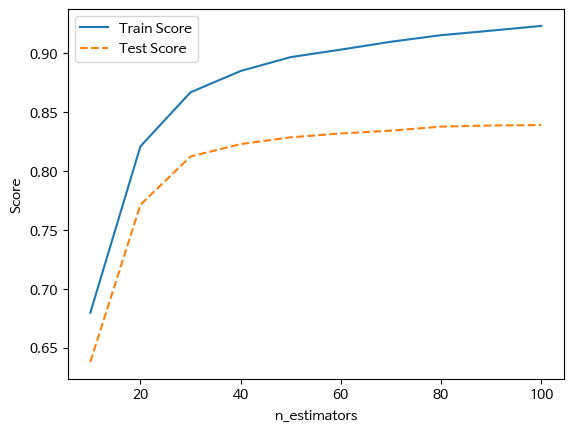

In [112]:
plt.plot(para_n_tree, train_score, linestyle='-', label= "Train Score")
plt.plot(para_n_tree, test_score, linestyle='--', label= "Test Score")
plt.xlabel("n_estimators"); plt.ylabel("Score")
plt.legend()

- n_estimators=100

In [114]:
train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1,11)]

for v_n_lr in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=v_n_lr, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["learning_rate"] = para_lr
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,learning_rate,TestScore
0,0.1,0.839
1,0.2,0.861
2,0.3,0.860
3,0.4,0.852
4,0.5,0.838
5,0.6,0.819
6,0.7,0.827
7,0.8,0.845
8,0.9,0.818
9,1.0,0.781


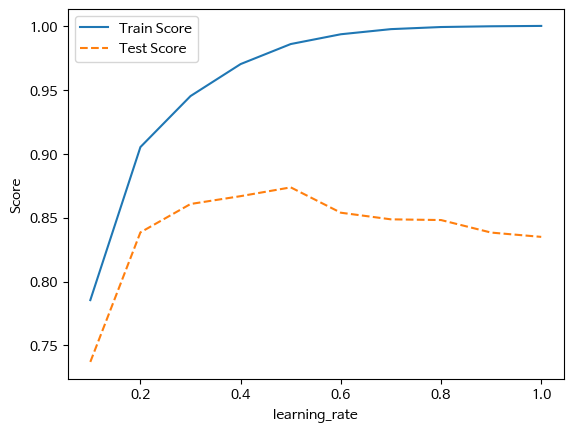

In [118]:
plt.plot(para_lr, train_score, linestyle='-', label= "Train Score")
plt.plot(para_lr, test_score, linestyle='--', label= "Test Score")
plt.xlabel("learning_rate"); plt.ylabel("Score")
plt.legend()

- learning_rate = 0.5

In [119]:
train_score = []; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2,
                                   max_depth=v_depth, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["max depth"] = para_depth
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,max depth,TestScore
0,1,0.737
1,2,0.838
2,3,0.861
3,4,0.867
4,5,0.874
5,6,0.854
6,7,0.849
7,8,0.848
8,9,0.838
9,10,0.835


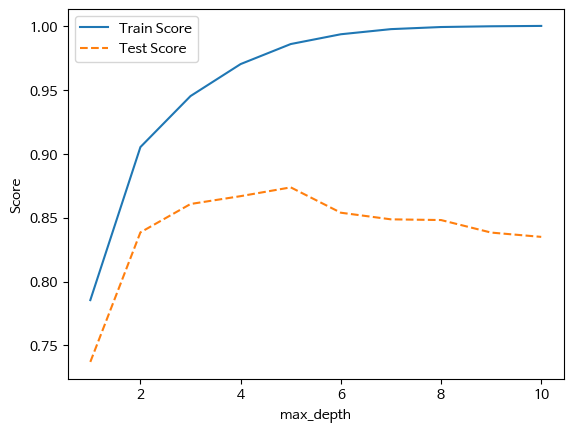

In [120]:
plt.plot(para_depth, train_score, linestyle='-', label= "Train Score")
plt.plot(para_depth, test_score, linestyle='--', label= "Test Score")
plt.xlabel("max_depth"); plt.ylabel("Score")
plt.legend()

- max_depth = 5

In [124]:
train_score = []; test_score=[]

para_leaf = [leaf for leaf in range(1,11)]

for v_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2,
                                   max_depth=5, min_samples_leaf=v_leaf, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["min samples leaf"] = para_leaf
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,min samples leaf,TestScore
0,1,0.874
1,2,0.862
2,3,0.856
3,4,0.854
4,5,0.855
5,6,0.860
6,7,0.857
7,8,0.852
8,9,0.855
9,10,0.868


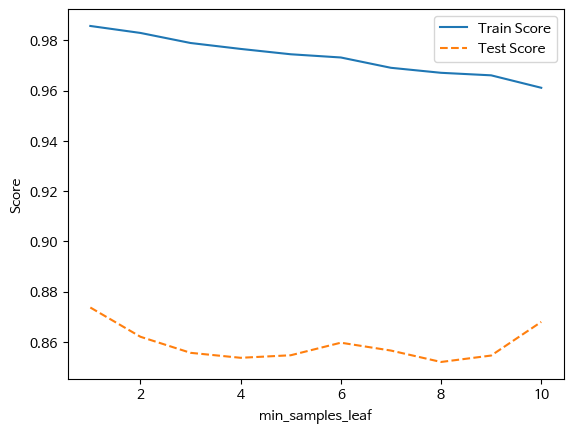

In [125]:
plt.plot(para_leaf, train_score, linestyle='-', label= "Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label= "Test Score")
plt.xlabel("min_samples_leaf"); plt.ylabel("Score")
plt.legend()

- min_samples_leaf = 1

In [126]:
train_score = []; test_score=[]

para_split = [leaf*2 for leaf in range(1,11)]

for v_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2,
                                   max_depth=5, min_samples_leaf=1, min_samples_split=v_split, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["min samples split"] = para_split
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,min samples split,TestScore
0,2,0.874
1,4,0.859
2,6,0.872
3,8,0.873
4,10,0.871
5,12,0.868
6,14,0.874
7,16,0.866
8,18,0.867
9,20,0.867


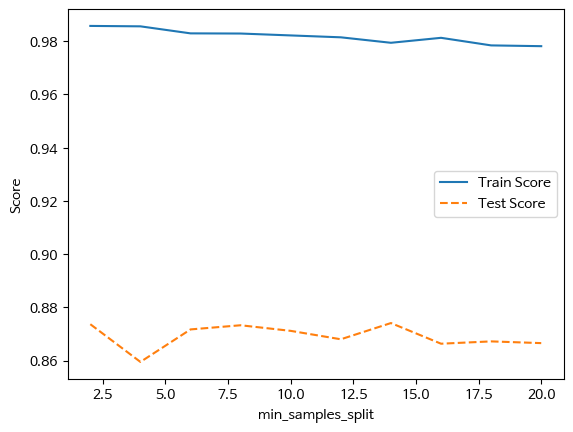

In [127]:
plt.plot(para_split, train_score, linestyle='-', label= "Train Score")
plt.plot(para_split, test_score, linestyle='--', label= "Test Score")
plt.xlabel("min_samples_split"); plt.ylabel("Score")
plt.legend()

- min_samples_split = 14

In [128]:
gb_final = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.5, max_depth= 5, min_samples_leaf=1, min_samples_split=14,
                         random_state=1234)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(gb.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(gb.score(df_test_x, df_test_y)))

Score on training set 0.978
Score on test set 0.867
